# WeatherPy
-------------------

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#THE EXCEPT IS NOT PRINTING
cloudiness, new_cities, country, date, humidity, lat, lng, max_temp, wind_speed = \
    [], [], [], [], [], [], [], [], []
print("Beginning Data Retrieval")
print("----------------------------------------------")
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
count = 1
record = 1
for city in cities:
    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    weather_response = requests.get(query_url).json()
    try:
        if record <= 50:
            print(f"Processing Record {record} of Set {count} | {city}")
            record += 1
        else:
            record = 1
            count += 1 
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response['main']['humidity'])
        lng.append(weather_response['coord']['lon'])
        lat.append(weather_response['coord']['lat'])
        wind_speed.append(weather_response["wind"]["speed"])
        max_temp.append(weather_response['main']['temp_max'])
        new_cities.append(city)
    except:
        print(f"City not found. Skipping...")
        pass
   #Change units to imperial 

Beginning Data Retrieval
----------------------------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | taraclia
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | arlit
Processing Record 6 of Set 1 | coihaique
Processing Record 7 of Set 1 | leningradskiy
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | narsaq
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | mangai
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | eirunepe
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | aswan
Processing Record 19 of Set 1 | buariki
City not found. Skipping...
Processing Record 20 of Set 1 | okhotsk
Processing Record 21 of Set 1 | boffa
Processing Record 22 of Set 1 | lebu
Processing Record 23 of 

Processing Record 39 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 40 of Set 4 | bambous virieux
Processing Record 41 of Set 4 | dumas
Processing Record 42 of Set 4 | kosh-agach
Processing Record 43 of Set 4 | puerto rico
Processing Record 44 of Set 4 | eyl
Processing Record 45 of Set 4 | lashio
Processing Record 46 of Set 4 | manoel urbano
Processing Record 47 of Set 4 | ekhabi
Processing Record 48 of Set 4 | lehututu
Processing Record 49 of Set 4 | lagoa
Processing Record 50 of Set 4 | sheboygan
Processing Record 1 of Set 5 | katsuura


ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In [ ]:
# Display the length of the querries
print(f"Cloudiness:  {len(cloudiness)}")
print(f"New_cities:  {len(new_cities)}")
print(f"Country:     {len(country)}")
print(f"Date:        {len(date)}")
print(f"Humidity:    {len(humidity)}")
print(f"Lat:         {len(lat)}")
print(f"Lng:         {len(lng)}")
print(f"Max_temp:    {len(max_temp)}")
print(f"Wind_speed:  {len(wind_speed)}")


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": new_cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("Output/weather_data.csv", encoding="utf-8", index=False)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cape town,75,ZA,1579998942,88,-33.93,18.42,64.00,11.41
1,taraclia,78,MD,1579998942,44,45.90,28.67,34.95,3.42
2,rikitea,18,PF,1579998882,77,-23.12,-134.97,79.25,14.03
3,busselton,19,AU,1579998920,37,-33.65,115.33,81.00,8.79
4,arlit,16,NE,1579998943,10,18.74,7.39,66.99,8.59


### Plotting the Data  and saving the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

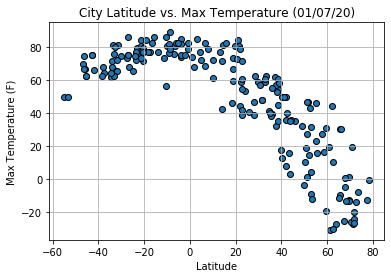

In [6]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (01/07/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Latitude vs. Temperature Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

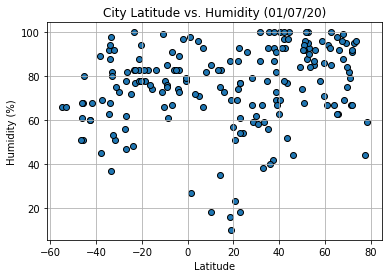

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Humidity (01/07/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Latitude vs.Humidity Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

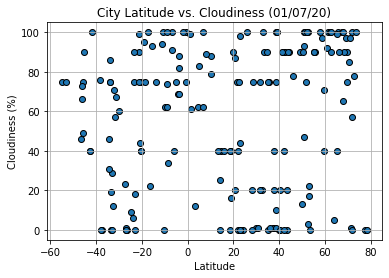

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (01/07/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Latitude vs.Cloudiness Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

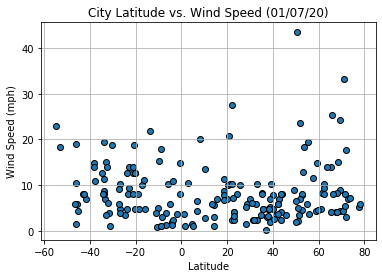

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (01/07/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Latitude vs.Wind Speed Plot.png")
plt.show()

## Linear Regression

In [10]:
# Create a function to create Linear Regression plots
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"Images/{ifig}.png")
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames
northern = weather_data.loc[weather_data["Lat"] >= 0.0]
#northern.reset_index(inplace=True)

southern = weather_data.loc[weather_data["Lat"] < 0.0]
#southern.reset_index(inplace=True)
northern.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,taraclia,78,MD,1579998942,44,45.90,28.67,34.95,3.42
4,arlit,16,NE,1579998943,10,18.74,7.39,66.99,8.59
6,leningradskiy,97,RU,1579998943,95,69.38,178.42,-12.41,4.21
7,jamestown,90,US,1579998908,97,42.10,-79.24,36.00,5.82
8,narsaq,92,GL,1579998943,67,60.92,-46.05,19.40,4.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8611460141711329


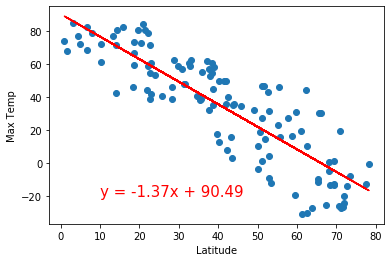

In [12]:
xdata = northern["Lat"]
ydata = northern["Max Temp"]
xlbl = "Latitude"
ylbl = "Max Temp"
lblpos = (10,-20)
ifig = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6462693231197247


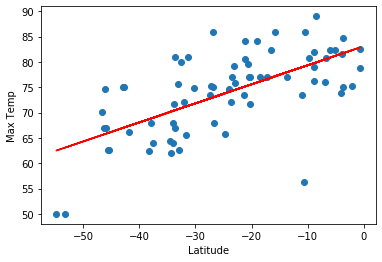

In [13]:
xdata = southern["Lat"]
ydata = southern["Max Temp"]
xlbl = "Latitude"
ylbl = "Max Temp"
lblpos = (-30,45)
ifig = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3226799038963633


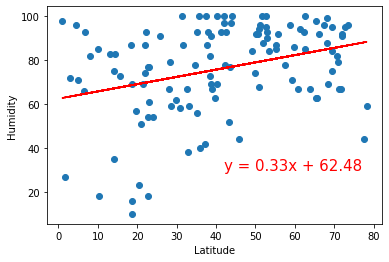

In [14]:
xdata = northern["Lat"]
ydata = northern["Humidity"]
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (42,30)
ifig = "Northern Hemisphere - Humidity vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3801076958685433


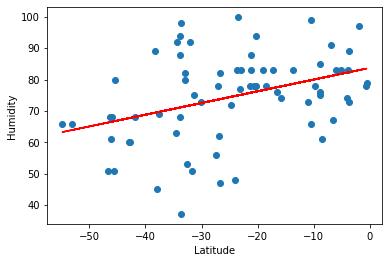

In [15]:
xdata = southern["Lat"]
ydata = southern["Humidity"]
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (-25,20)
ifig = "Southern Hemisphere - Humidity vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20810554387910823


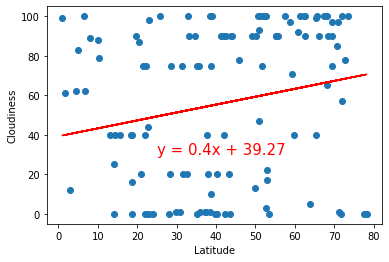

In [16]:
xdata = northern["Lat"]
ydata = northern["Cloudiness"]
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (25,30)
ifig = "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2527306065904297


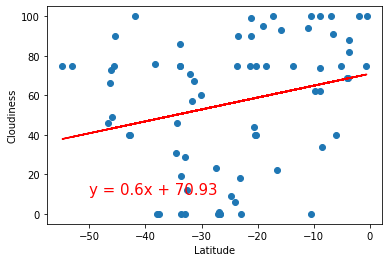

In [17]:
xdata = southern["Lat"]
ydata = southern["Cloudiness"]
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (-50,10)
ifig = "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1999030337453011


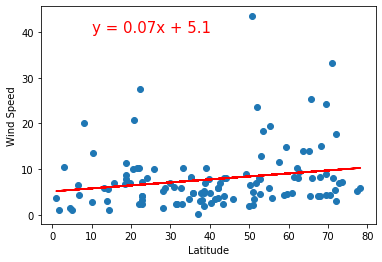

In [18]:
xdata = northern["Lat"]
ydata = northern["Wind Speed"]
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (10,40)
ifig = "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2801636046127726


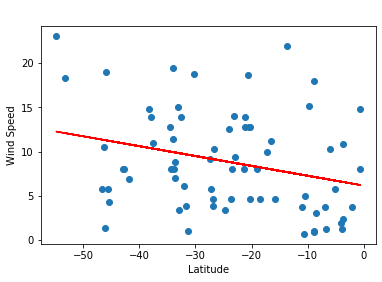

In [19]:
xdata = southern["Lat"]
ydata = southern["Wind Speed"]
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (-30,25)
ifig = "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression"
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig)

## Observations

1. As expected, temperature correlates well with the latitude. As latitude moves away from equator, temperature also decreases
2. It seems that humidity and latitude are fairly correlated
3. Even though there is very little correlation between wind speed and latitude, wind speed tends to be higher near arctic and antarctic